K-Means Formula <br>
Goal: Minimize the sum of squared distances between points and their cluster centroids.<br>
Objective Function: <br>
$$ J=i=1∑k​x∈Ci​∑​∣∣x−μi​∣∣2 $$

Where: <br>
* $ Ci$ = Cluster i
* $Ui$ = Centriod of cluster i
* $ X$ = Data Points

Steps: <br>
We want to find 𝑘 <br>
k clusters that minimize this total variance. <br>
Find optimal k (Elbow Method) <br>
Plot within-cluster-sum-of-squares (WCSS) vs. k.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib


Load Scaled Data

In [2]:
scaled_df = pd.read_csv(r"C:\Users\Alex Marco\Downloads\Projects\Customer Segmentation\Data\Processed\processed_customers.csv")  # or your processed file
X = scaled_df # KMeans only uses numeric features
print(scaled_df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0       1   19                  15                      39   
1       1   21                  15                      81   
2       0   20                  16                       6   
3       0   23                  16                      77   
4       0   31                  17                      40   

   Spending_Efficiency  Income_Spend_Interaction  
0             2.600000                       585  
1             5.400000                      1215  
2             0.375000                        96  
3             4.812500                      1232  
4             2.352941                       680  


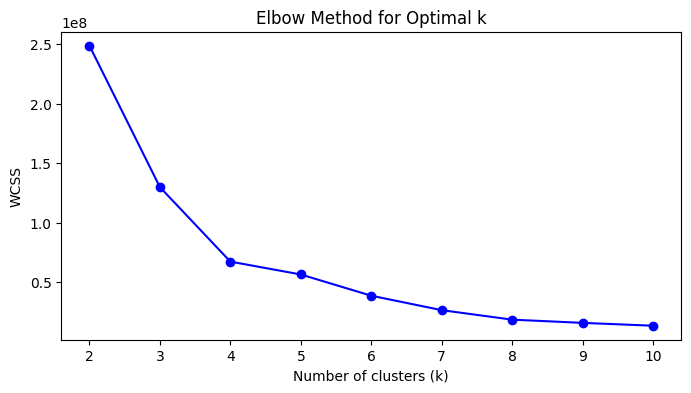

In [3]:
wcss = []
K = list(range(2, 11)) # Testing k from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, wcss, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


Validate with Silhouette Score <br>

The Silhouette Score measures how well each point fits within its cluster (1 = best, -1 = worst). <br>


$$ 
 Spending Score = \frac{b - a}{\max(a, b)}
$$

	​


Where: <br>
𝑎 = mean distance between a sample and all other points in its cluster <br>

𝑏 = mean distance between a sample and points in the nearest other cluster <br>

Range: <br>

+1 → Perfect separation <br>

0 → Clusters overlap <br>

Negative → Wrong clustering

In [4]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"For k={k}, silhouette score={score:.3f}")


For k=2, silhouette score=0.745
For k=3, silhouette score=0.632
For k=4, silhouette score=0.634
For k=5, silhouette score=0.622
For k=6, silhouette score=0.556
For k=7, silhouette score=0.558
For k=8, silhouette score=0.562
For k=9, silhouette score=0.541
For k=10, silhouette score=0.546


In [5]:
## Train Final K-Means Model
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_label = kmeans.fit_predict(scaled_df)
scaled_df['Cluster']= cluster_label

## Compute mean feature values per cluster to interpret behavior
cluster_sum = scaled_df.groupby('Cluster').mean()
print(cluster_sum)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.376238  40.950495           58.217822               50.851485   
1        0.333333  32.222222           90.000000               90.222222   
2        0.533333  39.316667           47.616667               28.350000   
3        0.480000  32.800000           78.800000               78.680000   
4        0.600000  33.000000          119.000000               84.800000   

         Spending_Efficiency  Income_Spend_Interaction  
Cluster                                                 
0                   1.057939               2726.207921  
1                   1.013869               8092.777778  
2                   1.145597                950.950000  
3                   1.014387               6162.360000  
4                   0.727316              10012.200000  


Label them for interpretability

In [6]:
cluster_names = {
   0: 'Budget Buyers',
    1: 'Luxury Spenders',
    2: 'Moderate Spenders',
    3: 'Young Impulsive',
    4: 'High Income Savers'
    
}

scaled_df['Cluster_Label'] = scaled_df['Cluster'].map(cluster_names)

In [7]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    200 non-null    int64  
 1   Age                       200 non-null    int64  
 2   Annual Income (k$)        200 non-null    int64  
 3   Spending Score (1-100)    200 non-null    int64  
 4   Spending_Efficiency       200 non-null    float64
 5   Income_Spend_Interaction  200 non-null    int64  
 6   Cluster                   200 non-null    int32  
 7   Cluster_Label             200 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 11.8+ KB


Visualize the Segments <br>

Use PCA to reduce dimensions to 2D for visualization.

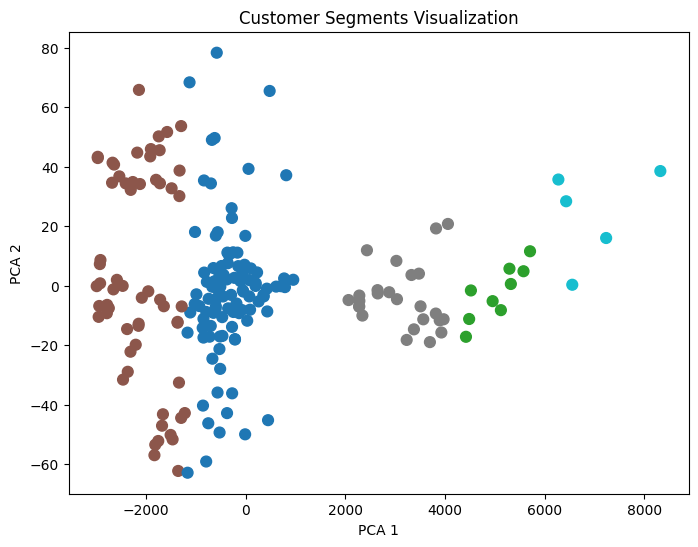

In [8]:
from sklearn.decomposition import PCA

# Keep only numeric features
X = scaled_df.drop(columns=['Cluster_Label'])  # Drop the string column



pca = PCA(2)
pca_data = pca.fit_transform(X)
scaled_df['pca1'] = pca_data[:,0]
scaled_df['pca2'] = pca_data[:,1]

plt.figure(figsize=(8,6))
plt.scatter(scaled_df['pca1'], scaled_df['pca2'], c=scaled_df['Cluster'], cmap='tab10', s=60)
plt.title('Customer Segments Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Save the Clustering Model

In [9]:
# Save labeled data
scaled_df.to_csv(r'C:\Users\Alex Marco\Downloads\Projects\Customer Segmentation\Data\Processed\cluster_customers.csv', index=False)

# Save trained KMeans model
joblib.dump(kmeans, '../Model/kmeans_model.pkl')

['../Model/kmeans_model.pkl']